# Convolutional Neural Network



In this section, I train several CNNs with 3x3 filters and test them on the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset:

### Architecture
(conv - batch_norm - relu - pool) x M - (affine-batch_norm - relu) x N - softmax

I selected the top 3 models and created a neural ensemble.

- Activation units: Convolutional layer, pooling layer, Affine Transformation, ReLU
- Learning algorithms: Stochastic Gradient Descent, Adam
- Optimisation: Batch Normalisation, Ensemble

**Best ensemble accuracy: 84.6%**

Outperforms baseline classifiers by 2.24x and fully-connected nets by 1.59x.

In [4]:
import random
import numpy as np
from data_utils import *
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [5]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.iteritems():
    print '%s: ' % k, v.shape

X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


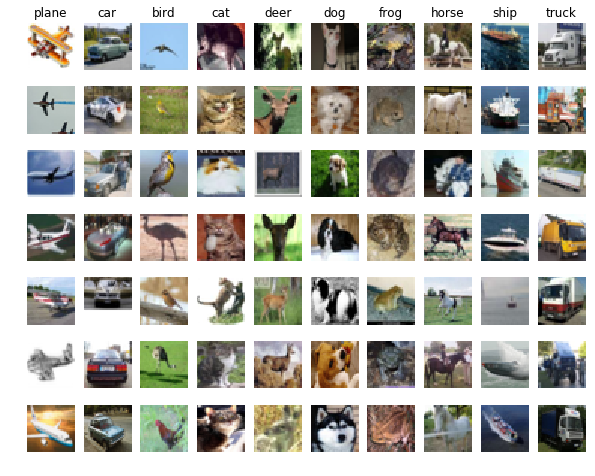

In [3]:
cifar10_dir = 'datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [2]:
from neural_networks.classifiers.cnn import *
from neural_networks import *
from gradient_check import *
from neural_networks.layers import *
from neural_networks.layer_utils import *

solvers = {}

In [10]:
model = OptimalConvNet(weight_scale=1e-3, num_filters = [128, 128, 128],
                            hidden_dims=[128, 128], reg=1e-3, filter_size = 3,use_batchnorm=True)

solver = Solver(model, data,
                num_epochs=10, batch_size=100,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-3,
                },
                verbose=True, print_every=500)
solver.train()

solvers['model_1'] = solver

(Iteration 1 / 4900) loss: 2.302360
(Epoch 0 / 10) train acc: 0.109000; val_acc: 0.139000
(Epoch 1 / 10) train acc: 0.703000; val_acc: 0.666000
(Iteration 501 / 4900) loss: 0.996762
(Epoch 2 / 10) train acc: 0.743000; val_acc: 0.701000
(Iteration 1001 / 4900) loss: 0.929730
(Epoch 3 / 10) train acc: 0.825000; val_acc: 0.757000
(Iteration 1501 / 4900) loss: 0.742989
(Epoch 4 / 10) train acc: 0.828000; val_acc: 0.751000
(Iteration 2001 / 4900) loss: 0.758771
(Epoch 5 / 10) train acc: 0.861000; val_acc: 0.752000
(Iteration 2501 / 4900) loss: 0.699262
(Epoch 6 / 10) train acc: 0.866000; val_acc: 0.776000
(Iteration 3001 / 4900) loss: 0.807360
(Epoch 7 / 10) train acc: 0.888000; val_acc: 0.778000
(Iteration 3501 / 4900) loss: 0.628741
(Epoch 8 / 10) train acc: 0.888000; val_acc: 0.769000
(Iteration 4001 / 4900) loss: 0.630776
(Epoch 9 / 10) train acc: 0.889000; val_acc: 0.774000
(Iteration 4501 / 4900) loss: 0.703805
(Epoch 10 / 10) train acc: 0.908000; val_acc: 0.794000


In [17]:
solvers['model_1'].train()

(Iteration 1 / 4900) loss: 0.548960
(Epoch 10 / 10) train acc: 0.898000; val_acc: 0.794000
(Epoch 11 / 10) train acc: 0.904000; val_acc: 0.767000
(Iteration 501 / 4900) loss: 0.626768
(Epoch 12 / 10) train acc: 0.909000; val_acc: 0.778000
(Iteration 1001 / 4900) loss: 0.466324
(Epoch 13 / 10) train acc: 0.929000; val_acc: 0.794000
(Iteration 1501 / 4900) loss: 0.580036
(Epoch 14 / 10) train acc: 0.934000; val_acc: 0.778000
(Iteration 2001 / 4900) loss: 0.553917
(Epoch 15 / 10) train acc: 0.922000; val_acc: 0.784000
(Iteration 2501 / 4900) loss: 0.473354
(Epoch 16 / 10) train acc: 0.920000; val_acc: 0.786000
(Iteration 3001 / 4900) loss: 0.472867
(Epoch 17 / 10) train acc: 0.918000; val_acc: 0.798000
(Iteration 3501 / 4900) loss: 0.655303
(Epoch 18 / 10) train acc: 0.934000; val_acc: 0.788000
(Iteration 4001 / 4900) loss: 0.467820
(Epoch 19 / 10) train acc: 0.931000; val_acc: 0.783000
(Iteration 4501 / 4900) loss: 0.615804
(Epoch 20 / 10) train acc: 0.938000; val_acc: 0.797000


In [6]:
model = OptimalConvNet(weight_scale=1e-3, num_filters = [128, 128, 128, 256],
                            hidden_dims=[128, 128], reg=5e-2, filter_size = 3,use_batchnorm=True)

solver = Solver(model, data,
                num_epochs=20, batch_size=100,
                update_rule='adam',
                optim_config={
                  'learning_rate': 5e-5,
                },
                verbose=True, print_every=500)
solver.train()

solvers['model_2'] = solver

(Iteration 1 / 9800) loss: 2.321535
(Epoch 0 / 20) train acc: 0.165000; val_acc: 0.193000
(Epoch 1 / 20) train acc: 0.583000; val_acc: 0.583000
(Iteration 501 / 9800) loss: 1.469441
(Epoch 2 / 20) train acc: 0.711000; val_acc: 0.690000
(Iteration 1001 / 9800) loss: 1.050151
(Epoch 3 / 20) train acc: 0.767000; val_acc: 0.736000
(Iteration 1501 / 9800) loss: 0.758288
(Epoch 4 / 20) train acc: 0.820000; val_acc: 0.742000
(Iteration 2001 / 9800) loss: 0.710463
(Epoch 5 / 20) train acc: 0.852000; val_acc: 0.780000
(Iteration 2501 / 9800) loss: 0.725976
(Epoch 6 / 20) train acc: 0.881000; val_acc: 0.802000
(Iteration 3001 / 9800) loss: 0.657562
(Epoch 7 / 20) train acc: 0.912000; val_acc: 0.820000
(Iteration 3501 / 9800) loss: 0.602719
(Epoch 8 / 20) train acc: 0.924000; val_acc: 0.791000
(Iteration 4001 / 9800) loss: 0.439074
(Epoch 9 / 20) train acc: 0.923000; val_acc: 0.804000
(Iteration 4501 / 9800) loss: 0.524473
(Epoch 10 / 20) train acc: 0.921000; val_acc: 0.793000
(Iteration 5001 / 9

In [11]:
model = OptimalConvNet(weight_scale=5e-2, num_filters = [256, 256, 256],
                            hidden_dims=[128, 128], reg=1e-2, filter_size = 3,use_batchnorm=True)

solver = Solver(model, data,
                num_epochs=10, batch_size=100,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-3,
                },
                verbose=True, print_every=500)
solver.train()

solvers['model_3'] = solver

(Iteration 1 / 4900) loss: 24.033599
(Epoch 0 / 10) train acc: 0.195000; val_acc: 0.167000
(Epoch 1 / 10) train acc: 0.618000; val_acc: 0.623000
(Iteration 501 / 4900) loss: 1.631532
(Epoch 2 / 10) train acc: 0.668000; val_acc: 0.660000
(Iteration 1001 / 4900) loss: 1.339261
(Epoch 3 / 10) train acc: 0.685000; val_acc: 0.698000
(Iteration 1501 / 4900) loss: 1.340402
(Epoch 4 / 10) train acc: 0.726000; val_acc: 0.702000
(Iteration 2001 / 4900) loss: 1.364473
(Epoch 5 / 10) train acc: 0.708000; val_acc: 0.694000
(Iteration 2501 / 4900) loss: 1.556194
(Epoch 6 / 10) train acc: 0.757000; val_acc: 0.730000
(Iteration 3001 / 4900) loss: 1.212694
(Epoch 7 / 10) train acc: 0.790000; val_acc: 0.745000
(Iteration 3501 / 4900) loss: 1.154954
(Epoch 8 / 10) train acc: 0.749000; val_acc: 0.738000
(Iteration 4001 / 4900) loss: 1.140602
(Epoch 9 / 10) train acc: 0.782000; val_acc: 0.727000
(Iteration 4501 / 4900) loss: 1.043768
(Epoch 10 / 10) train acc: 0.777000; val_acc: 0.756000


In [16]:
solvers['model_3'].train()

(Iteration 1 / 4900) loss: 1.095484
(Epoch 10 / 10) train acc: 0.795000; val_acc: 0.757000
(Epoch 11 / 10) train acc: 0.777000; val_acc: 0.760000
(Iteration 501 / 4900) loss: 0.920681
(Epoch 12 / 10) train acc: 0.771000; val_acc: 0.744000
(Iteration 1001 / 4900) loss: 1.151172
(Epoch 13 / 10) train acc: 0.813000; val_acc: 0.763000
(Iteration 1501 / 4900) loss: 0.941818
(Epoch 14 / 10) train acc: 0.828000; val_acc: 0.766000
(Iteration 2001 / 4900) loss: 1.153734
(Epoch 15 / 10) train acc: 0.833000; val_acc: 0.774000
(Iteration 2501 / 4900) loss: 1.083988
(Epoch 16 / 10) train acc: 0.819000; val_acc: 0.773000
(Iteration 3001 / 4900) loss: 0.855300
(Epoch 17 / 10) train acc: 0.834000; val_acc: 0.785000
(Iteration 3501 / 4900) loss: 0.920484
(Epoch 18 / 10) train acc: 0.841000; val_acc: 0.764000
(Iteration 4001 / 4900) loss: 0.846585
(Epoch 19 / 10) train acc: 0.828000; val_acc: 0.756000
(Iteration 4501 / 4900) loss: 0.786523
(Epoch 20 / 10) train acc: 0.833000; val_acc: 0.772000


In [7]:
model = OptimalConvNet(weight_scale=5e-2, num_filters = [16, 32, 64, 128],
                            hidden_dims=[128, 128], reg=5e-2, filter_size = 3,use_batchnorm=True)

solver = Solver(model, data,
                num_epochs=20, batch_size=100,
                update_rule='adam',
                optim_config={
                  'learning_rate': 8e-5,
                },
                verbose=True, print_every=500)
solver.train()

solvers['model_4'] = solver

(Iteration 1 / 9800) loss: 13.596307
(Epoch 0 / 20) train acc: 0.112000; val_acc: 0.120000
(Epoch 1 / 20) train acc: 0.495000; val_acc: 0.487000
(Iteration 501 / 9800) loss: 7.302825
(Epoch 2 / 20) train acc: 0.611000; val_acc: 0.593000
(Iteration 1001 / 9800) loss: 4.437266
(Epoch 3 / 20) train acc: 0.652000; val_acc: 0.601000
(Iteration 1501 / 9800) loss: 3.031776
(Epoch 4 / 20) train acc: 0.702000; val_acc: 0.634000
(Iteration 2001 / 9800) loss: 2.318978
(Epoch 5 / 20) train acc: 0.743000; val_acc: 0.645000
(Iteration 2501 / 9800) loss: 1.960116
(Epoch 6 / 20) train acc: 0.777000; val_acc: 0.657000
(Iteration 3001 / 9800) loss: 1.748951
(Epoch 7 / 20) train acc: 0.806000; val_acc: 0.656000
(Iteration 3501 / 9800) loss: 1.520252
(Epoch 8 / 20) train acc: 0.808000; val_acc: 0.660000
(Iteration 4001 / 9800) loss: 1.251403
(Epoch 9 / 20) train acc: 0.855000; val_acc: 0.669000
(Iteration 4501 / 9800) loss: 1.356017
(Epoch 10 / 20) train acc: 0.852000; val_acc: 0.669000
(Iteration 5001 / 

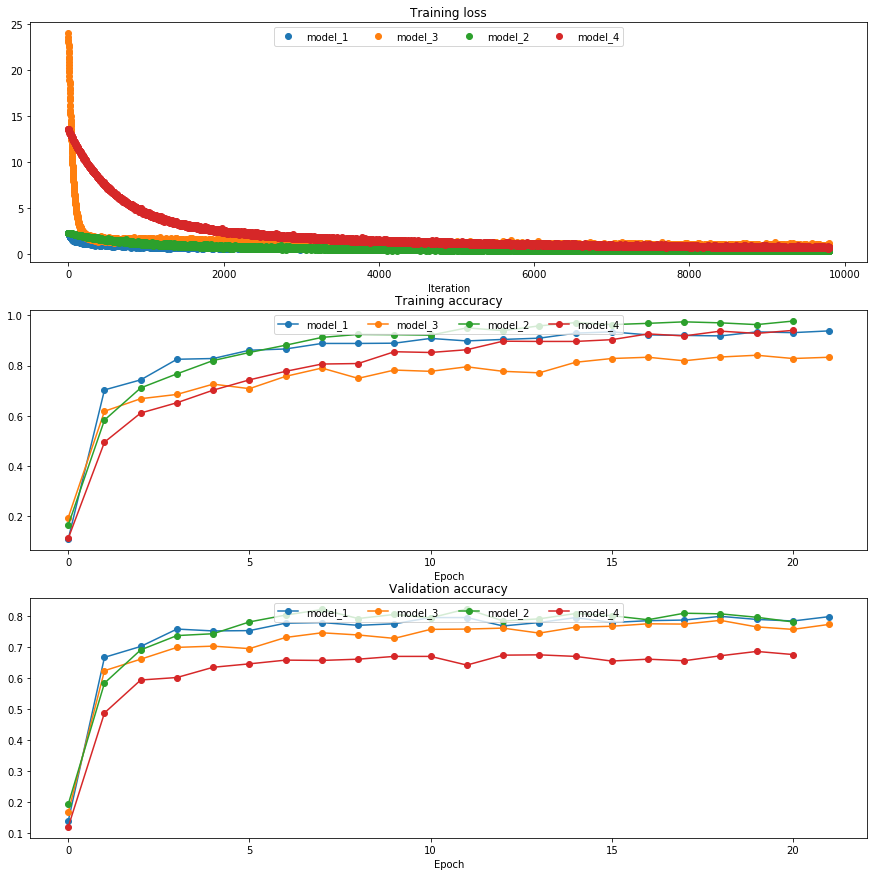

In [18]:
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')
for model, solver in solvers.iteritems():
    plt.subplot(3, 1, 1)
    plt.plot(solver.loss_history, 'o', label=model)

    plt.subplot(3, 1, 2)
    plt.plot(solver.train_acc_history, '-o', label=model)

    plt.subplot(3, 1, 3)
    plt.plot(solver.val_acc_history, '-o', label=model)
for i in [1, 2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

In [19]:
X_test, X_val, y_test, y_val = data['X_test'], data['X_val'], data['y_test'], data['y_val']

for model, solver in solvers.iteritems():
    y_test_pred = np.argmax(solver.model.loss(X_test), axis=1)
    y_val_pred = np.argmax(solver.model.loss(X_val), axis=1)
    print 'Model %s' % model
    print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
    print 'Test set accuracy: %f \n' % (y_test_pred == y_test).mean()
    print '\n'

Model model_1
Validation set accuracy:  0.808
Test set accuracy: 0.798000 



Model model_3
Validation set accuracy:  0.79
Test set accuracy: 0.784000 



Model model_2
Validation set accuracy:  0.82
Test set accuracy: 0.783000 



Model model_4
Validation set accuracy:  0.69
Test set accuracy: 0.703000 





## Ensemble

Simple ensemble that adds up the scores of the models before evaluating them.

**Test accuracy: 84.6%**

In [21]:
ensemble = {}
ensemble['model_1'] = solvers['model_1']
ensemble['model_2'] = solvers['model_2']
ensemble['model_3'] = solvers['model_3']
# ensemble['model_4'] = solvers['model_4']
# exclude models with substandard performance

n = len(ensemble)
N = float (n)


scores = np.zeros((X_test.shape[0], 10))
for i in range(n):
    ensemble_n = 'model_' + str(i+1)
    scores += ensemble[ensemble_n].model.loss(X_test)
y_test_pred = np.argmax(scores, axis=1)
print 'Test set accuracy: %f \n' % (y_test_pred == y_test).mean()

Test set accuracy: 0.846000 

